# Project PAD Jan Solarz

## Data import

The data represents the content of movie reviews. The review could be either positive or negative (the evaluation is included in the sentiment column).


In [188]:
#Reprezentacja z użyciem funkcji ważącej TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
#Task
#Wykorzystamy teraz macierz wag TFidf aby stworzyć klasyfikator, przewidujący sentyment recenzji filmu, wziętej z portalu IMDB
#Nasz zbiór danych liczy 25 tysięcy obserwacji, zbió jest zbilansowany ze względu na klasę.
#Wykorzystamy regresję logistyczną
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import numpy as np

In [189]:
import pandas as pd
import re
PATH = r'C:/Users/Jan Solarz/Downloads/sentiment_movies.csv'


df = pd.read_csv(PATH, encoding='latin-1')







def clean_text(x):
    x = x.lower()
    x = x.replace('.','')
    x = x.replace(',','')
    x = x.replace(':','')
    x = x.replace(';','')
    x = x.replace('!','')
    x = x.replace('?','')
    x = x.replace('<br>','')
    x = x.replace('<br />','')
    x = ' '.join([word for word in x.split() if word.isalpha()])
    return x

df['SentimentText'] = df['SentimentText'].apply(clean_text)

df

,SentimentText,Sentiment
0,first think another disney movie might good ki...,1
1,put aside dr house repeat missed desperate hou...,0
2,big fan stephen work film made even greater fa...,1
3,watched horrid thing tv needless say one movie...,0
4,truly enjoyed film acting terrific plot jeff c...,1
...,...,...
24995,kid anything connected disney definition great...,0
24996,course reading review seen film already one fa...,1
24997,read girl came peter low period watching movie...,0
24998,film quite boring snippets naked flesh tossed ...,0


We cleaned the Text from all special characteres.

## Preprocessing

To reduce the size of the matrix, we only include words that appear in at least 10 documents. We are calculating the TFIDF weights for all words in the dataset.

In [190]:
tfidf = TfidfVectorizer(min_df=10) #by zredukować rozmiar macierzy uwzględniamy tylko słowa, ktore pojawiły się w conajmniej 10 dokumentach

inputs= tfidf.fit_transform(df['SentimentText'])
target = df['Sentiment']


In [191]:
a = pd.DataFrame(inputs.todense(), columns = tfidf.get_feature_names()) #reprezentacja w formie ramki danych
a

,aag,aames,aaron,ab,abandon,abandoned,abandoning,abandonment,abandons,abbot,...,zombies,zone,zoo,zoom,zooms,zorro,zu,zucker,zulu,zuniga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 1000 words with the highest AVERAGE TFIDF.

In [192]:
o = []
for i in a.columns:
    u = a[i].mean()
    o.append(u)
z = pd.DataFrame(o,a.columns.to_numpy())
z.columns = ['weight']


In [193]:
pop = z.sort_values('weight',ascending=False).head(1000)
best = pop.index[0:10]
pop

,weight
movie,0.049906
film,0.041229
one,0.027543
like,0.024120
good,0.021290
...,...
twists,0.001562
bizarre,0.001561
charming,0.001561
singing,0.001561


In [194]:
df_result = pd.DataFrame(a, columns=best)
df_result


,movie,film,one,like,good,really,would,story,even,see
0,0.250684,0.000000,0.000000,0.000000,0.066037,0.0,0.000000,0.000000,0.000000,0.00000
1,0.043171,0.000000,0.045863,0.051123,0.056861,0.0,0.000000,0.000000,0.060366,0.00000
2,0.086116,0.091873,0.073189,0.000000,0.045370,0.0,0.024317,0.025347,0.024083,0.00000
3,0.050657,0.000000,0.107634,0.000000,0.066722,0.0,0.000000,0.000000,0.070835,0.07222
4,0.000000,0.078212,0.000000,0.000000,0.000000,0.0,0.051753,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...
24995,0.081948,0.000000,0.000000,0.000000,0.053968,0.0,0.000000,0.000000,0.114590,0.00000
24996,0.000000,0.126068,0.031384,0.034984,0.000000,0.0,0.000000,0.043476,0.000000,0.00000
24997,0.200668,0.000000,0.042637,0.047527,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
24998,0.045147,0.096331,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000


# Data analysis

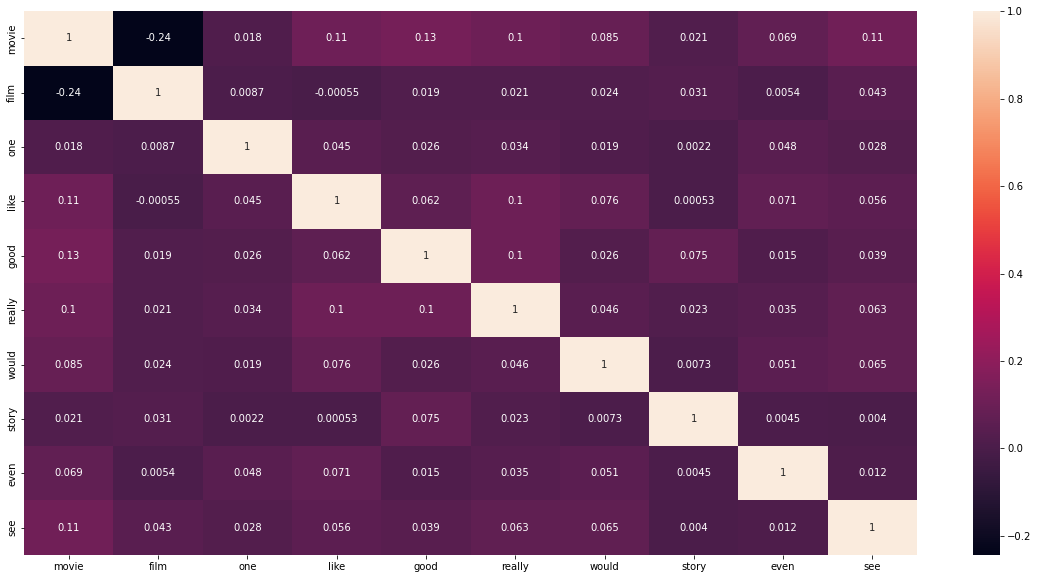

,movie,film,one,like,good,really,would,story,even,see
movie,1.000000,-0.243228,0.018457,0.106572,0.127164,0.104257,0.085465,0.021221,0.068834,0.111951
film,-0.243228,1.000000,0.008735,-0.000549,0.019362,0.020842,0.023836,0.030531,0.005415,0.043410
one,0.018457,0.008735,1.000000,0.045393,0.026392,0.034180,0.018962,0.002204,0.048135,0.027522
like,0.106572,-0.000549,0.045393,1.000000,0.062003,0.104901,0.076021,0.000534,0.070967,0.055898
good,0.127164,0.019362,0.026392,0.062003,1.000000,0.102561,0.025724,0.075412,0.015435,0.038834
really,0.104257,0.020842,0.034180,0.104901,0.102561,1.000000,0.045728,0.023413,0.034874,0.063479
would,0.085465,0.023836,0.018962,0.076021,0.025724,0.045728,1.000000,0.007326,0.051266,0.064596
story,0.021221,0.030531,0.002204,0.000534,0.075412,0.023413,0.007326,1.000000,0.004463,0.004016
even,0.068834,0.005415,0.048135,0.070967,0.015435,0.034874,0.051266,0.004463,1.000000,0.012398
see,0.111951,0.043410,0.027522,0.055898,0.038834,0.063479,0.064596,0.004016,0.012398,1.000000


In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_full_health = df_result.corr()
ax = sns.heatmap(correlation_full_health, annot = True)
plt.show()
correlation_full_health

Above we can see the matrix correlation of 10 key words with the highest TFIDF average. 
Highest correlations have pairs of:
- movie and film
- good and movie
- see and movie
- movie and really 
- like and movie

Adding columns containing information about:
- Review length in words.
- Average word length.

In [198]:


l = []
k = []
for i in range(0,len(df['SentimentText'])):
    d = len(df['SentimentText'][i].split())
    d1 = len("".join(re.findall(r'[A-Za-z]', df['SentimentText'][i])))
    if d == 0:
        l.append(d)
        k.append(round(d1/1,2))
    else:
        l.append(d)
        k.append(round(d1/d,2))

df['len11']=l
df['mean11']=k
df 

,SentimentText,Sentiment,len11,mean11
0,first think another disney movie might good ki...,1,46,4.96
1,put aside dr house repeat missed desperate hou...,0,59,5.75
2,big fan stephen work film made even greater fa...,1,175,5.35
3,watched horrid thing tv needless say one movie...,0,51,5.18
4,truly enjoyed film acting terrific plot jeff c...,1,56,6.27
...,...,...,...,...
24995,kid anything connected disney definition great...,0,49,5.86
24996,course reading review seen film already one fa...,1,90,5.76
24997,read girl came peter low period watching movie...,0,58,5.74
24998,film quite boring snippets naked flesh tossed ...,0,44,6.70


## t-Student Test

In [199]:
from scipy.stats import ttest_ind
from scipy.stats import t
df.pos = df[df['Sentiment'] == 1]
df.neg = df[df['Sentiment'] == 0]
t_stat, p = ttest_ind(df.pos['mean11'], df.neg['mean11'])
print(f't={t_stat}, p={p}')
t.sf(t_stat, 25000-2)

t=15.45487650809669, p=1.2389163195676297e-53


C:\Users\JANSOL~1\AppData\Local\Temp/ipykernel_17412/2745650885.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\JANSOL~1\AppData\Local\Temp/ipykernel_17412/2745650885.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



6.194581597838149e-54

### Histograms (plots) of means in both groups

5.916939200000006

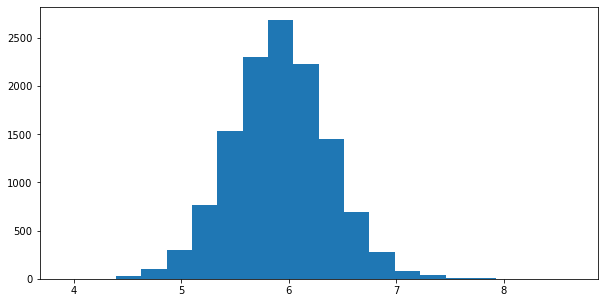

In [202]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(df.pos['mean11'],20)
np.mean(df.pos['mean11'])


5.831172000000021

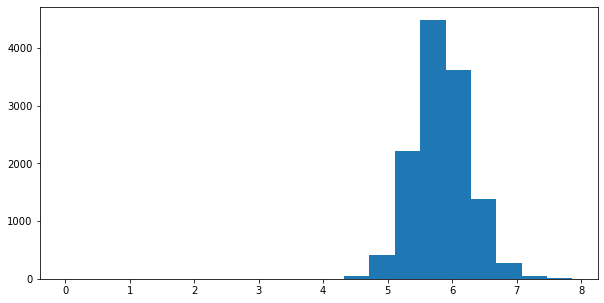

In [203]:
plt.hist(df.neg['mean11'],20)
np.mean(df.neg['mean11'])

- We got mean value 5.92 in positive sentiments records, and in negative 5.83
- The p-value of the test means that we have to reject the null hypothesis that mean values in both groups of sentrimets are equal. 

### Splitting the dataset into train and test samples

In [204]:

train_input,test_input,train_target,test_target = train_test_split(inputs,target, test_size=0.25)


## Classifications

#### LOGIT

In [222]:
#Logistic regression
model_log = LogisticRegression()
model_log.fit(train_input,train_target)

preds_log = model_log.predict(test_input)

In [223]:

prec_log = precision_score(test_target,preds_log)
recall_log = recall_score(test_target,preds_log)
accuracy_log = accuracy_score(test_target,preds_log)
roc_log = roc_auc_score(test_target,preds_log)

print("Positive sentiment precision:",prec_log)
print("Positive sentiment recall:",recall_log)
print("Negative sentiment precision:",precision_score(test_target,preds_log,pos_label = 0))
print("Negative sentiment recall:",recall_score(test_target,preds_log,pos_label = 0))
print("Classification accuracy:",accuracy_log)

Positive sentiment precision: 0.8724409448818897
Positive sentiment recall: 0.8895311496467566
Negative sentiment precision: 0.8881300813008131
Negative sentiment recall: 0.8708545918367347
Classification accuracy: 0.88016


#### NB

In [224]:
#NB classifier
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
test_input = test_input.toarray()
train_input = train_input.toarray()
model_nb.fit(train_input,train_target)
preds_NB = model_nb.predict(test_input)



In [225]:
prec_NB = precision_score(test_target,preds_NB)
recall_NB = recall_score(test_target,preds_NB)
accuracy_NB = accuracy_score(test_target,preds_NB)
roc_NB = roc_auc_score(test_target,preds_NB)
print("Positive sentiment precision:",prec_NB)
print("Positive sentiment recall:",recall_NB)
print("Negative sentiment precision:",precision_score(test_target,preds_NB,pos_label = 0))
print("Negative sentiment recall:",recall_score(test_target,preds_NB,pos_label = 0))
print("Classification accuracy:",accuracy_NB)

Positive sentiment precision: 0.7613875262789068
Positive sentiment recall: 0.6978163134232498
Negative sentiment precision: 0.7229093050647821
Negative sentiment recall: 0.782844387755102
Classification accuracy: 0.74048


#### KNN

In [226]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_input,train_target)
preds_knn = model_knn.predict(test_input)



In [227]:
prec_knn = precision_score(test_target,preds_knn)
recall_knn = recall_score(test_target,preds_knn)
accuracy_knn = accuracy_score(test_target,preds_knn)
roc_knn = roc_auc_score(test_target,preds_knn)

print("Positive sentiment precision:",prec_knn)
print("Positive sentiment recall:",recall_knn)
print("Negative sentiment precision:",precision_score(test_target,preds_knn,pos_label = 0))
print("Negative sentiment recall:",recall_score(test_target,preds_knn,pos_label = 0))
print("Classification accuracy:",accuracy_knn)

Positive sentiment precision: 0.7819205065072107
Positive sentiment recall: 0.7138728323699421
Negative sentiment precision: 0.7384796008218374
Negative sentiment recall: 0.8022959183673469
Classification accuracy: 0.75824


#### NN

In [228]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [229]:
X, Y = train_input,train_target

In [230]:
X = np.array(X)
Y = np.array(Y)

#.toarray()
#train_target = np

In [231]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [232]:
# build a model
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 



opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
# compile the model
model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)


history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=20, 
                    batch_size=10,
                    validation_split=0.25,
                    shuffle=True,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1723800   
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
 dense_6 (Dense)             (None, 6)                 66        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,724,883
Trainable params: 1,724,883
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1407/1407 [==============================] - 69s 44ms/step - loss: 0.6907 - accuracy: 0.6520 - val_loss: 0.6865 - val_accuracy: 0.7707 45s - loss: 0 - ETA: 42s - los

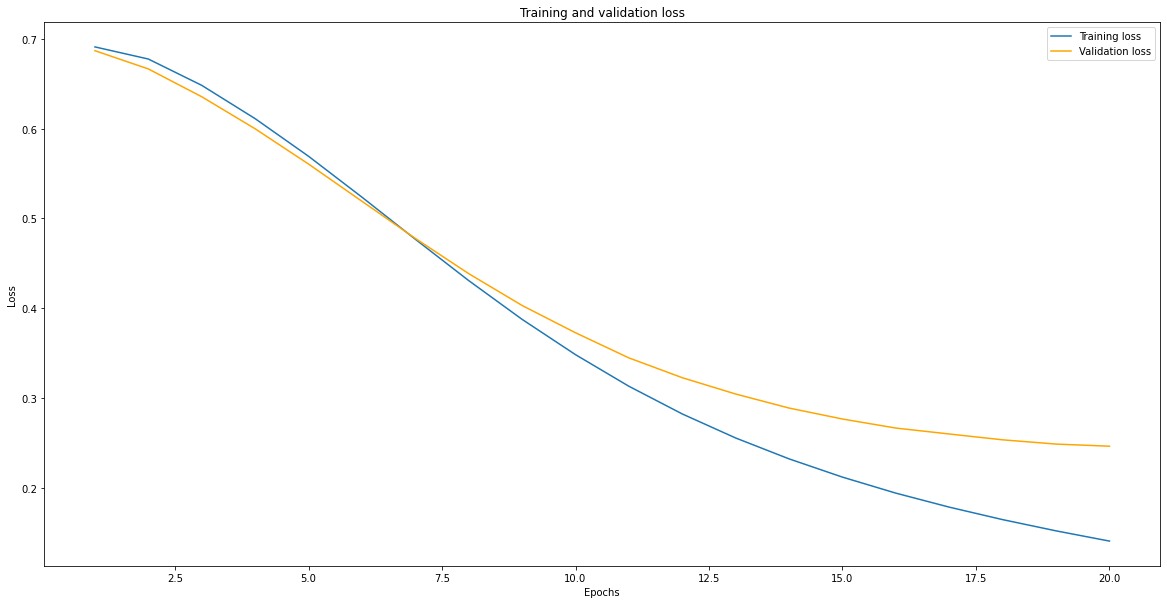

In [233]:
history_dict = history.history
plt.rcParams["figure.figsize"] = (20,10)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] 


epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

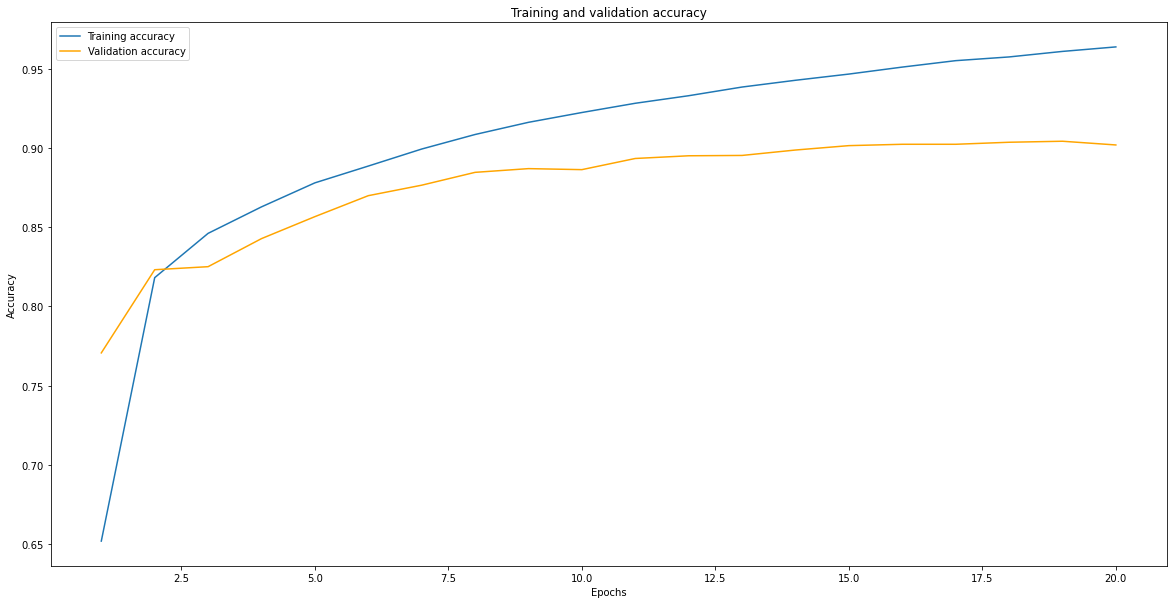

0.9042235612869263

In [234]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, label='Training accuracy')

plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


np.max(val_acc)

In [235]:
X = X.astype('float16')
Y = Y.astype('float16')

In [236]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


model.predict(X) 
np.round(model.predict(X),0) 


preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(Y, preds)) 

prec_NN = precision_score(Y,preds)
recall_NN = recall_score(Y,preds)
accuracy_NN = accuracy_score(Y,preds)
roc_NN = roc_auc_score(Y,preds)



print("Positive sentiment precision:",prec_NN)
print("Positive sentiment recall:",recall_NN)
print("Negative sentiment precision:",precision_score(Y,preds,pos_label = 0))
print("Negative sentiment recall:",recall_score(Y,preds,pos_label = 0))
print("Classification accuracy:",accuracy_NN)
roc_auc_score(Y,preds)

[[8828  536]
 [ 371 9015]]
Positive sentiment precision: 0.9438802219662863
Positive sentiment recall: 0.9604730449605796
Negative sentiment precision: 0.9596695292966627
Negative sentiment recall: 0.9427595044852627
Classification accuracy: 0.9516266666666666


0.9516162747229212

### Comparison of model's metrics

In [237]:
frame= pd.DataFrame([[prec_log,recall_log,accuracy_log,roc_log],[prec_NB,recall_NB,accuracy_NB,roc_NB],
                  [prec_knn,recall_knn,accuracy_knn,roc_knn],[prec_NN,recall_NN,accuracy_NN,roc_NN]])
frame.index = ["Logistic regression","Naive Bayes","KNN","Neural Network"]
frame.columns = [ "Precision", "Recall", "Accuracy", "ROC AUC value"]
frame

,Precision,Recall,Accuracy,ROC AUC value
Logistic regression,0.872441,0.889531,0.880160,0.880193
Naive Bayes,0.761388,0.697816,0.740480,0.740330
KNN,0.781921,0.713873,0.758240,0.758084
Neural Network,0.943880,0.960473,0.951627,0.951616


- As it is shown above the best efficient are NN, which are dependent on many factors.
- Logistic Regression is near 90% of accuracy.
- In that exapmle NB had the weakest predicitive abilites.

## Visualisation

In [238]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn import metrics

Text(0.5, 1.0, 'NN')

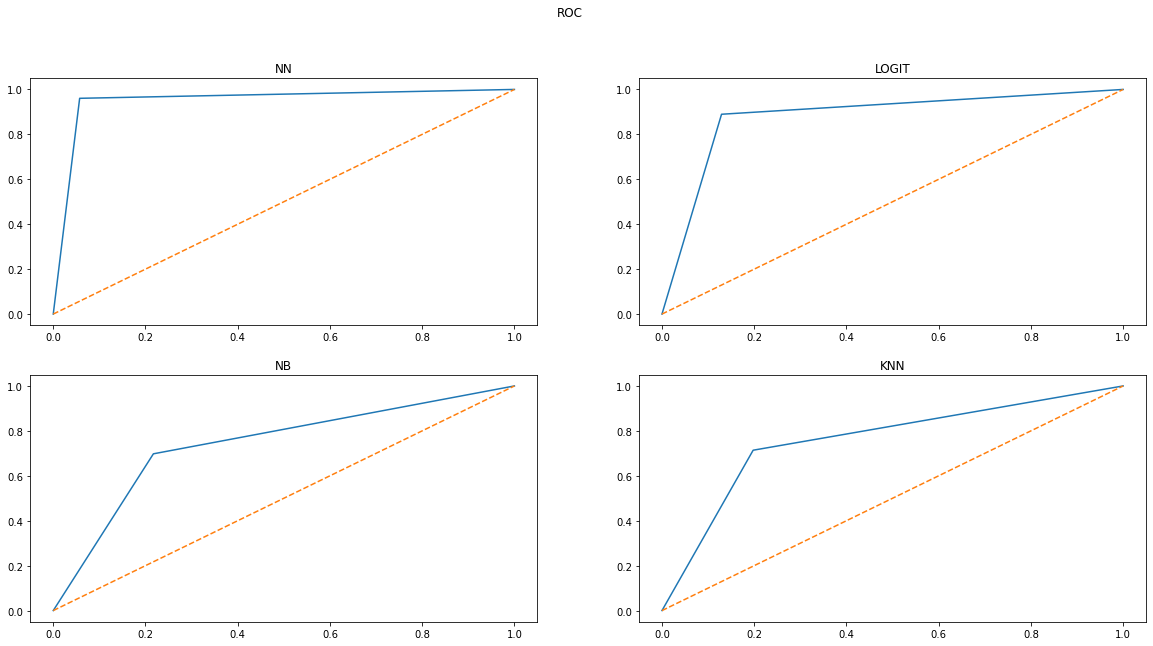

In [239]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ROC')


roc_log = metrics.roc_curve(test_target,preds_log, pos_label=1)
fpr = roc_log[0]
tpr = roc_log[1]
ax2.plot(fpr,tpr)
ax2.plot([0,1],[0,1], linestyle='--')
ax2.set_title("LOGIT")

roc_NB = metrics.roc_curve(test_target,preds_NB, pos_label=1)
fpr = roc_NB[0]
tpr = roc_NB[1]
ax3.plot(fpr,tpr)
ax3.plot([0,1],[0,1], linestyle='--')
ax3.set_title("NB")

roc_knn = metrics.roc_curve(test_target,preds_knn, pos_label=1)
fpr = roc_knn[0]
tpr = roc_knn[1]
ax4.plot(fpr,tpr)
ax4.plot([0,1],[0,1], linestyle='--')
ax4.set_title("KNN")


roc_NN = metrics.roc_curve(Y,preds, pos_label=1)
fpr = roc_NN[0]
tpr = roc_NN[1]
ax1.plot(fpr,tpr)
ax1.plot([0,1],[0,1], linestyle='--')
ax1.set_title("NN")

# DASH Dashboard

In [240]:
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc


In [241]:
import dash_html_components as html

In [242]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [243]:
import plotly.graph_objs as go

In [244]:
import dash
import dash_table
import pandas as pd


In [245]:
import dash
import dash_core_components as dcc
import dash_html_components as html



In [246]:
import plotly.express as px
metrics_plot = px.bar(frame, barmode='group',width=700, height=500)


In [247]:
roc_regr_plot = px.area(x=roc_log[0], y=roc_log[1],
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
roc_bayes_plot = px.area(x=roc_NB[0], y=roc_NB[1],
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
roc_knn_plot = px.area(x=roc_knn[0], y=roc_knn[1],
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
roc_nn_plot = px.area(x=roc_NN[0], y=roc_NN[1],
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

In [248]:
from dash.dependencies import Output,Input,State

In [249]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import plotly.graph_objs as go
import dash_html_components as html

In [250]:
import pandas as pd
app = JupyterDash(__name__,external_stylesheets = external_stylesheets)

app.layout = html.Div([
html.Div([
    html.H1("Dasboard of models comparison"),
    dcc.Dropdown(
        id = "dropdown1",
        options=[{'label': 'Metrics', 'value': 'met'},{'label': 'Logistic Regression Roc', 'value': 'LOGIT'},
            {'label': 'Naive Bayes Roc', 'value': 'NB'},
            {'label': 'Knn Roc', 'value': 'KNN'},
            {'label': 'Neural Network Roc', 'value': 'NN'}],
                      value='LOGIT',
                      ),
],
style={'width': '90%', 'display': 'inline-block'}
),
    
html.Div(
    dcc.Graph(
        id='graph1',
        className='dropgraph',
        style={'width':'600px','height':'450px'}
   ),
    style={'display':'inline-block'}
)

],
style={'width': '41%', 'display': 'inline-block'}
    
    
)


@app.callback(
Output('graph1', 'figure'), 
[Input('dropdown1', 'value')]
)


def update_graph(value):
    plts = {'met': metrics_plot, 
    'NB': roc_bayes_plot, 
    'LOGIT': roc_regr_plot, 
    'KNN': roc_knn_plot, 
    'NN':roc_nn_plot}
    return plts[value]



In [251]:
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

C:\Users\Jan Solarz\anaconda3\lib\site-packages\jupyter_dash\jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Dash app running on http://127.0.0.1:8052/
